## Objective: Determine what factors most significantly influence the price of a listing.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt 


import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
#importing cleaned airbnb dataset 
airbnb = pd.read_excel(r"F:\DATA Analysis\Airbnb project file\3.airbnbcleaned.xlsx")

In [3]:
airbnb.drop("Column1" , axis=1, inplace=True)
airbnb.head(5)

,id,name,rating,reviews,host_id,price,country,bathrooms,beds,guests,...,A_Climate_Control,A_Outdoor_Amenities,A_Views,A_Parking,A_Internet_Connectivity,A_Accessibility_Features,A_Fitness_Wellness,A_Location_Specific,A_Luxury_Special,A_Safety_Convenience
0,6733863,Yacht Charter On A Diving And Fishing Machine,0.0,0,31959777,173290,Thailand,3,8,8,...,air conditioning,Not specified,Not specified,free-parking on premises,Not specified,Not specified,Not specified,Not specified,Not specified,"workspace, luggage dropoff allowed"
1,50109759,Chinggis Khan Ger Stay In Gobi Desert,0.0,0,159681749,173290,Mongolia,1,1,2,...,"air conditioning, fireplace",garden,Not specified,free-parking on premises,wi-fi,Not specified,Not specified,Not specified,Not specified,workspace
2,30004712,Selin Presses,0.0,0,16450710,172625,Turkey,9,10,16,...,air conditioning,Not specified,Not specified,Not specified,wi-fi,Not specified,Not specified,Not specified,Not specified,Not specified
3,53745936,Luxury Gulet Charter 27 Mt 4 Cabin 9 Pax Capacity,0.0,0,263623848,172625,Turkey,4,5,4,...,air conditioning,Not specified,Not specified,Not specified,wi-fi,Not specified,Not specified,Not specified,Not specified,workspace
4,46228915,Villa Bella Mare,0.0,0,236962797,172137,Greece,3,6,10,...,air conditioning,"pool, patio or balcony",Not specified,free-parking on premises,wi-fi,Not specified,Not specified,Not specified,Not specified,Not specified


In [4]:
print("Total records (rows) in the airbnb Dataset : {}".format(airbnb.shape[0]))
print("Total features (columns) in the airbnb Dataset : {}".format(airbnb.shape[1]))

Total records (rows) in the airbnb Dataset : 12340
Total features (columns) in the airbnb Dataset : 42


In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12340 entries, 0 to 12339
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        12340 non-null  int64  
 1   name                      12337 non-null  object 
 2   rating                    12340 non-null  float64
 3   reviews                   12340 non-null  int64  
 4   host_id                   12340 non-null  int64  
 5   price                     12340 non-null  int64  
 6   country                   12340 non-null  object 
 7   bathrooms                 12340 non-null  int64  
 8   beds                      12340 non-null  int64  
 9   guests                    12340 non-null  int64  
 10  toilets                   12340 non-null  int64  
 11  bedrooms                  12340 non-null  int64  
 12  studios                   12340 non-null  int64  
 13  checkin                   12340 non-null  object 
 14  checko

In [6]:
included_cols = ['price', 'rating', 'reviews',  'bathrooms', 'beds', 'guests', 'toilets', 'bedrooms', 'studios']
description = airbnb[included_cols].describe().round(3)
description

,price,rating,reviews,bathrooms,beds,guests,toilets,bedrooms,studios
count,12340.00,12340.000,12340.000,12340.000,12340.000,12340.000,12340.000,12340.000,12340.000
mean,13977.04,3.284,32.714,1.687,2.937,4.987,0.019,1.919,0.024
std,19077.02,2.276,51.294,1.405,2.545,3.525,0.138,1.606,0.153
min,393.00,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
25%,3994.00,0.000,1.000,1.000,1.000,2.000,0.000,1.000,0.000
50%,8024.00,4.780,11.000,1.000,2.000,4.000,0.000,1.000,0.000
75%,15436.75,4.940,41.000,2.000,4.000,6.000,0.000,2.000,0.000
max,173290.00,5.000,313.000,9.000,16.000,16.000,1.000,21.000,1.000


### Descriptive analysis 

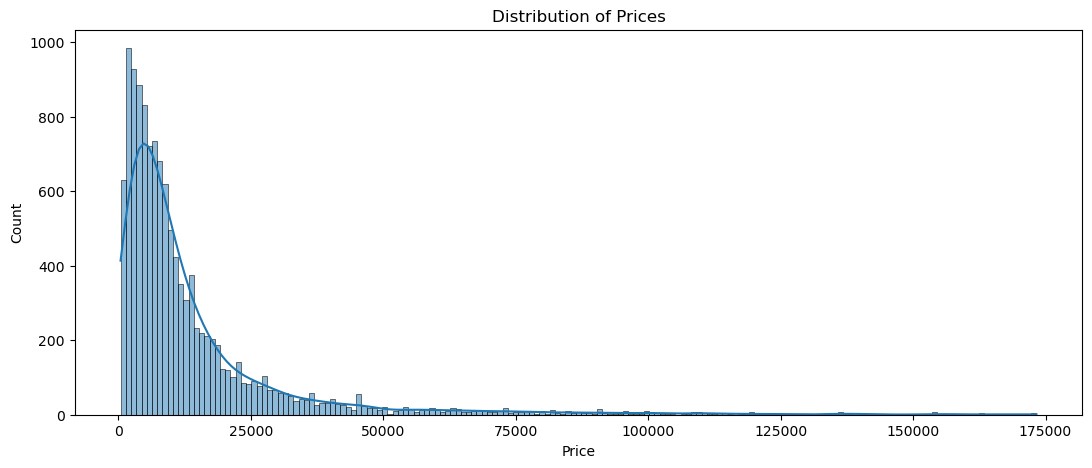

In [7]:
# Distribution of prices
plt.figure(figsize=(13, 5))
sns.histplot(airbnb['price'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.show()

As we can see the graph is sweaked to the left side indicating the price of most listing lies under ₹25000 

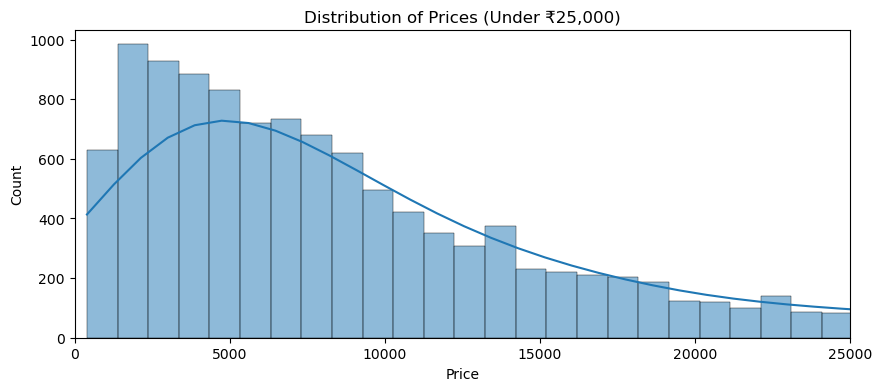

In [8]:
# zooming into the price distribution for better view 
plt.figure(figsize=(10, 4))
sns.histplot(airbnb['price'], kde=True)
plt.title('Distribution of Prices (Under ₹25,000)')
plt.xlabel('Price')
plt.xlim(0, 25000)  
plt.show()

### Based on this graph, the common range for average rental price for Airbnb listing prices falls between ₹3,000 and ₹15,000. 

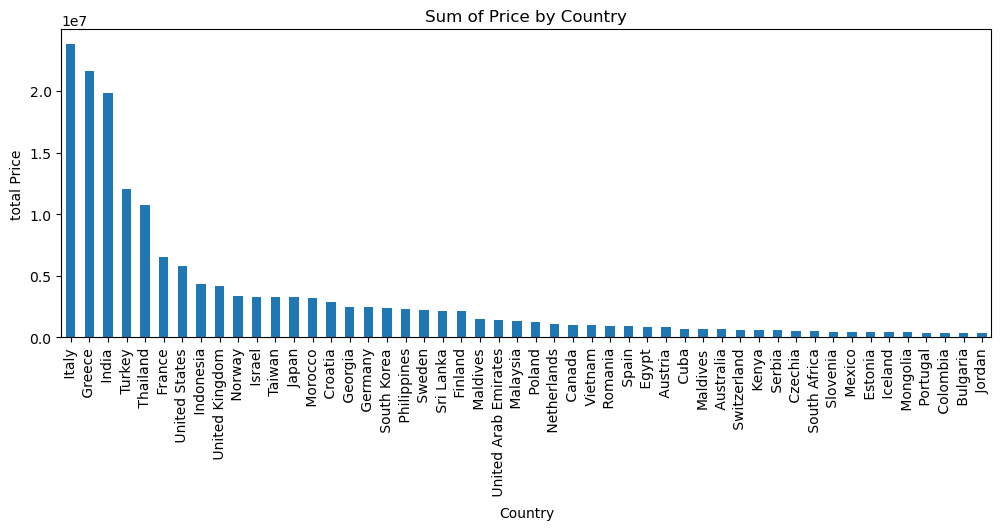

In [9]:
## Understanding price country vise 
Sum_price_by_country = airbnb.groupby('country')['price'].sum().sort_values(ascending=False).head(50)
plt.figure(figsize=(12, 4))
Sum_price_by_country.plot(kind='bar')
plt.title('Sum of Price by Country')
plt.xlabel('Country')
plt.ylabel('total Price')
plt.xticks(rotation=90)
plt.show()

based on this graph the Italy, Germany, India, Turky and Thailand are the most revenu generating countries for airbnb 

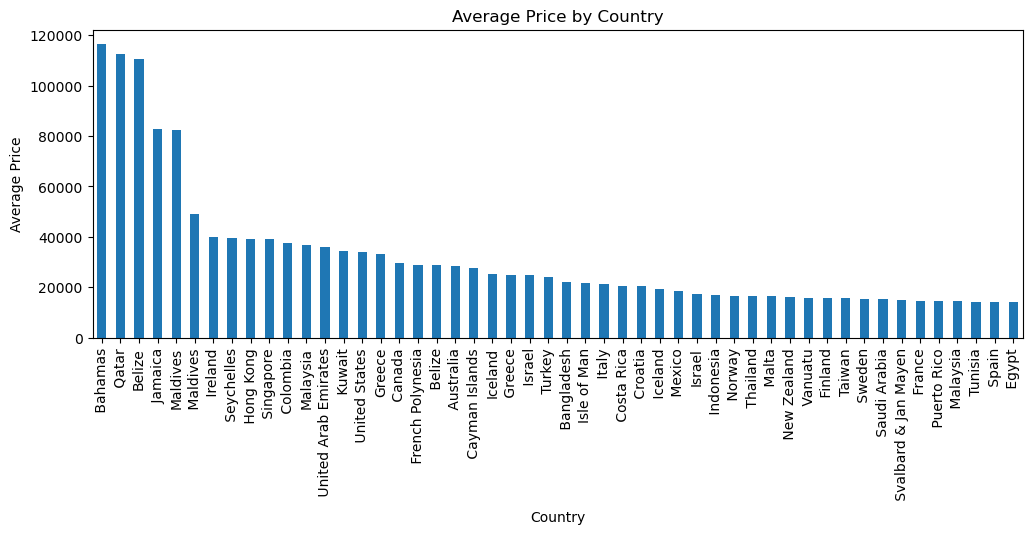

In [10]:
# Average price by country
avg_price_by_country = airbnb.groupby('country')['price'].mean().sort_values(ascending=False).head(50)
plt.figure(figsize=(12, 4))
avg_price_by_country.plot(kind='bar')
plt.title('Average Price by Country')
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


the avergage price for the Bahamas, Qatar, and Belize is above 100000, that tells us that these countries are luxurious listings 

## Understanding relationships between various features and the price 

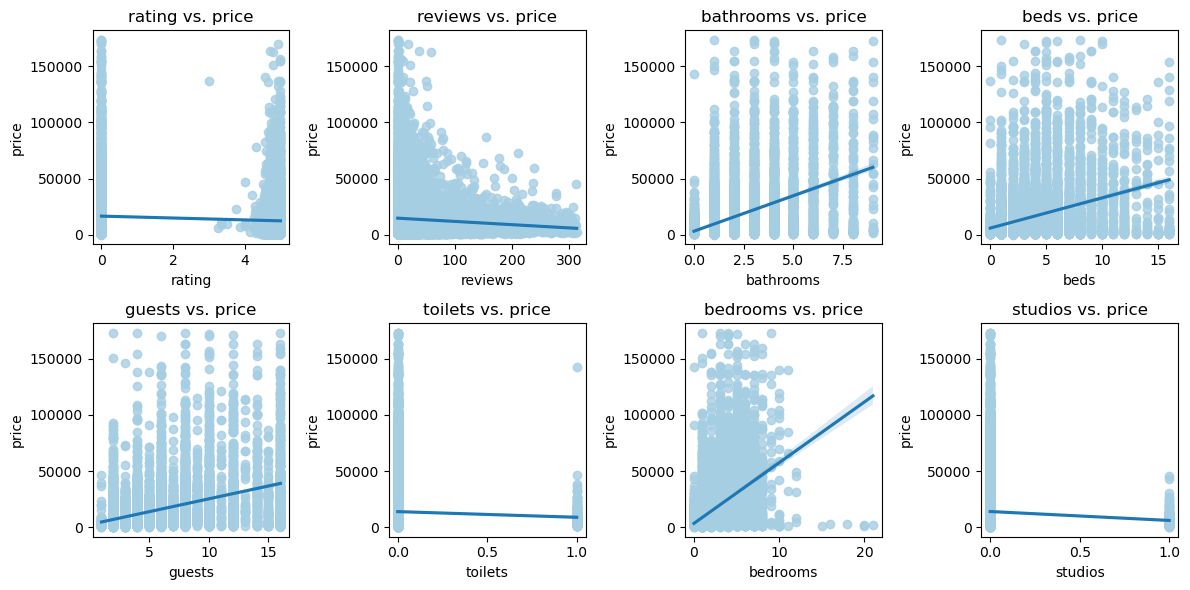

In [11]:
target_variable = 'price'
numerical_columns = ['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toilets', 'bedrooms', 'studios']

colors = sns.color_palette('Paired') 
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
row, col = 0, 0

for col_name in numerical_columns:
    
    sns.regplot(
        x=airbnb[col_name],
        y=airbnb[target_variable],
        ax=axes[row, col],
        scatter_kws={'color': colors[0]},
        line_kws={'color': colors[1]}
    )
    axes[row, col].set_xlabel(col_name)
    axes[row, col].set_ylabel(target_variable)
    axes[row, col].set_title(f"{col_name} vs. {target_variable}")

    col += 1
    if col >= 4:
        row += 1
        col = 0
plt.tight_layout()
plt.show()


1) Rating vs. Price: The plot shows no clear pattern or correlation between rating and price.

2) Reviews vs. Price: There is a noticeable negative correlation between the number of reviews and the price.  
                      As the number of reviews increases, prices generally decrease, indicating that well-reviewed properties are likely more                                 affordable or priced competitively.

3) Bathrooms vs. Price: A positive correlation is visible; listings with more bathrooms tend to have higher prices.  
                        There is a spread of prices for each number of bathrooms, but generally, more bathrooms lead to higher prices.

4) Beds vs. Price: There is a weak positive correlation between the number of beds and the price.  
                   Listings with more beds have higher prices, but the correlation is not very strong.

5) Guests vs. Price: A positive correlation is visible; listings that can accommodate more guests tend to have higher prices.

6) Toilets vs. Price: The plot indicates a positive correlation between the number of toilets and the price.

7) Bedrooms vs. Price: There is a positive correlation between the number of bedrooms and the price.  
                       Listings with more bedrooms generally command higher prices.High prices are particularly concentrated in listings with more than 

8) Studios vs. Price: The plot indicates that listings marked as studios generally have lower prices.   
                      Few high-priced outliers exist, but most studio listings are at the lower end of the price spectrum.

In [12]:
# encoding other non numeric value to understand the relationship between them and the price 

def custom_encode(value):
    if value in ['No', 'Not specified', 'Not reported']:
        return 0
    else:
        return 1

categorical_columns = [
    'R_pets_allowed', 'R_smoking_allowed',
    'R_parties_allowed', 'R_suitable_for_infants', 'R_self_check_in',
    'S_carbon_monoxide_alarm', 'S_smoke_alarm', 'S_security_camera',
    'S_nearby_water', 'S_heights_risk', 'S_dangerous_animals',
    'S_climbing_structure', 'S_pool_or_hot_tub', 'A_Entertainment_Systems',
    'A_Kitchen_Appliances', 'A_Laundry_Facilities', 'A_Climate_Control',
    'A_Outdoor_Amenities', 'A_Views', 'A_Parking', 'A_Internet_Connectivity',
    'A_Accessibility_Features', 'A_Fitness_Wellness', 'A_Location_Specific',
    'A_Luxury_Special', 'A_Safety_Convenience'
]

# Creating a copy of the original DataFrame
df_encoded = airbnb.copy() 

for column in categorical_columns:
    df_encoded[column] = df_encoded[column].apply(custom_encode)

df_encoded.head(5)

,id,name,rating,reviews,host_id,price,country,bathrooms,beds,guests,...,A_Climate_Control,A_Outdoor_Amenities,A_Views,A_Parking,A_Internet_Connectivity,A_Accessibility_Features,A_Fitness_Wellness,A_Location_Specific,A_Luxury_Special,A_Safety_Convenience
0,6733863,Yacht Charter On A Diving And Fishing Machine,0.0,0,31959777,173290,Thailand,3,8,8,...,1,0,0,1,0,0,0,0,0,1
1,50109759,Chinggis Khan Ger Stay In Gobi Desert,0.0,0,159681749,173290,Mongolia,1,1,2,...,1,1,0,1,1,0,0,0,0,1
2,30004712,Selin Presses,0.0,0,16450710,172625,Turkey,9,10,16,...,1,0,0,0,1,0,0,0,0,0
3,53745936,Luxury Gulet Charter 27 Mt 4 Cabin 9 Pax Capacity,0.0,0,263623848,172625,Turkey,4,5,4,...,1,0,0,0,1,0,0,0,0,1
4,46228915,Villa Bella Mare,0.0,0,236962797,172137,Greece,3,6,10,...,1,1,0,1,1,0,0,0,0,0


### Correlation Heatmap

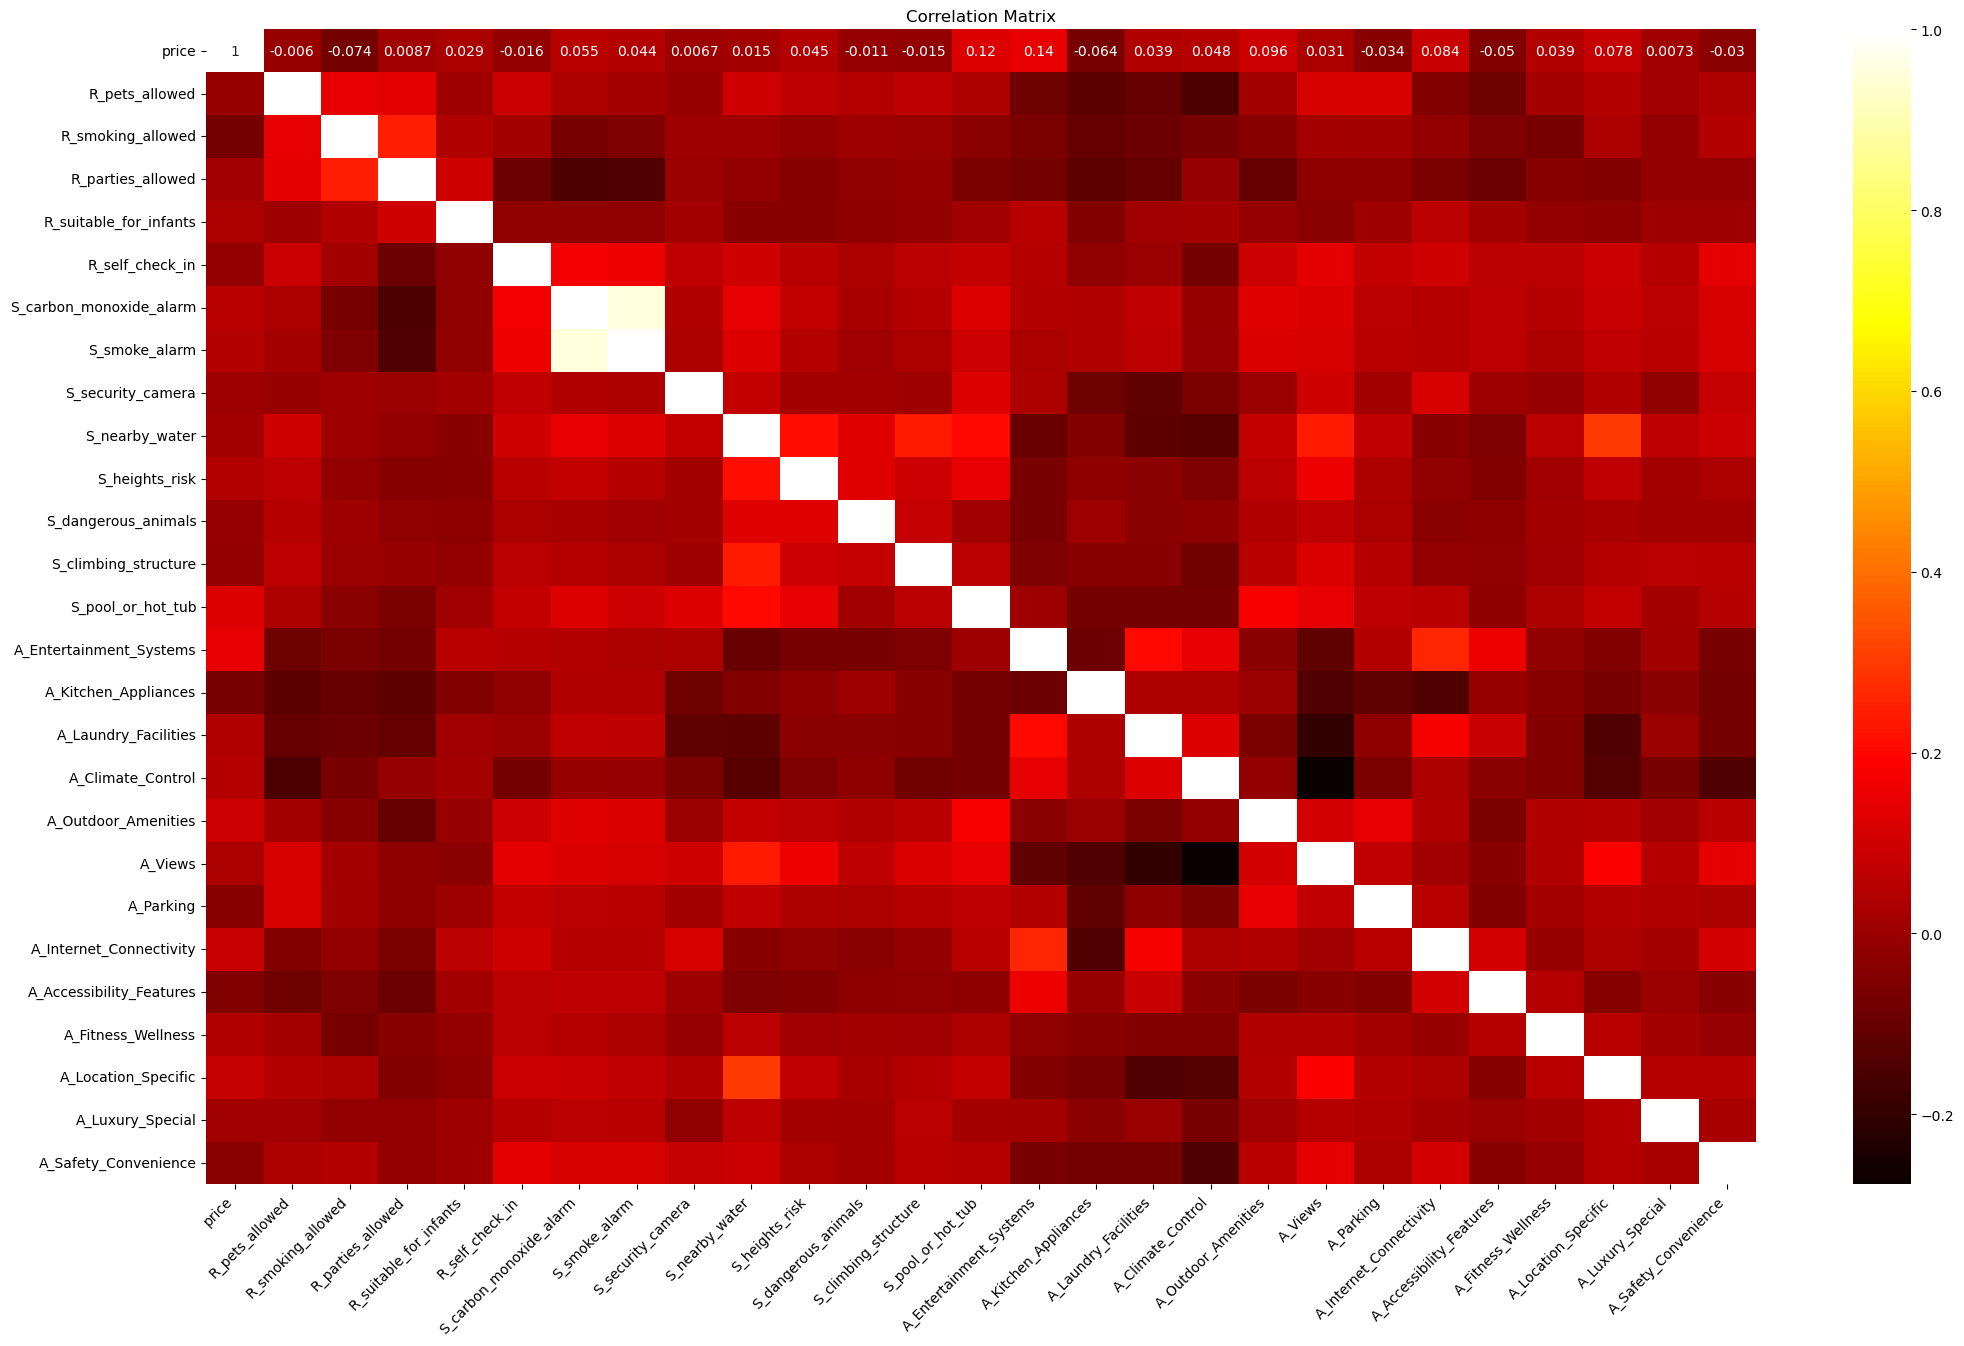

,price,R_pets_allowed,R_smoking_allowed,R_parties_allowed,R_suitable_for_infants,R_self_check_in,S_carbon_monoxide_alarm,S_smoke_alarm,S_security_camera,S_nearby_water,...,A_Climate_Control,A_Outdoor_Amenities,A_Views,A_Parking,A_Internet_Connectivity,A_Accessibility_Features,A_Fitness_Wellness,A_Location_Specific,A_Luxury_Special,A_Safety_Convenience
price,1.000000,-0.005959,-0.074350,0.008683,0.028808,-0.016197,0.054929,0.043913,0.006654,0.014502,...,0.048019,0.096190,0.031207,-0.033757,0.084127,-0.049883,0.038677,0.078291,0.007268,-0.030238
R_pets_allowed,-0.005959,1.000000,0.145632,0.137615,0.006710,0.086660,0.028589,0.019394,-0.006098,0.097190,...,-0.151063,0.013240,0.108534,0.109622,-0.052526,-0.086225,0.017802,0.041774,0.009645,0.033307
R_smoking_allowed,-0.074350,0.145632,1.000000,0.249618,0.041500,0.013635,-0.068464,-0.057614,0.003025,0.002265,...,-0.067438,-0.033927,0.016918,0.012653,-0.015004,-0.055691,-0.071105,0.034208,-0.014938,0.046246
R_parties_allowed,0.008683,0.137615,0.249618,1.000000,0.101604,-0.088246,-0.148153,-0.141049,0.000783,-0.016357,...,-0.012349,-0.099102,-0.025465,-0.026455,-0.059116,-0.088725,-0.035218,-0.045693,-0.014061,-0.016904
R_suitable_for_infants,0.028808,0.006710,0.041500,0.101604,1.000000,-0.021396,-0.021294,-0.019798,0.013152,-0.036219,...,0.020168,-0.010481,-0.032521,0.004823,0.058401,0.013299,-0.016231,-0.027718,0.003960,0.005038
R_self_check_in,-0.016197,0.086660,0.013635,-0.088246,-0.021396,1.000000,0.167358,0.158773,0.068442,0.100503,...,-0.076100,0.091663,0.140809,0.071689,0.099021,0.057098,0.058530,0.089155,0.046959,0.137494
S_carbon_monoxide_alarm,0.054929,0.028589,-0.068464,-0.148153,-0.021294,0.167358,1.000000,0.954006,0.038308,0.145167,...,-0.004677,0.126733,0.119661,0.057723,0.048511,0.065302,0.047209,0.081707,0.059567,0.112685
S_smoke_alarm,0.043913,0.019394,-0.057614,-0.141049,-0.019798,0.158773,0.954006,1.000000,0.035277,0.123501,...,-0.009722,0.119398,0.108874,0.053815,0.046929,0.064094,0.033601,0.067135,0.056373,0.110831
S_security_camera,0.006654,-0.006098,0.003025,0.000783,0.013152,0.068442,0.038308,0.035277,1.000000,0.075456,...,-0.059923,0.000489,0.098402,0.013257,0.112434,0.005144,-0.011525,0.041085,-0.019614,0.077376
S_nearby_water,0.014502,0.097190,0.002265,-0.016357,-0.036219,0.100503,0.145167,0.123501,0.075456,1.000000,...,-0.128165,0.071727,0.240046,0.069124,-0.037462,-0.053875,0.060377,0.296686,0.064418,0.088117


In [13]:
target_variable = 'price'
numerical_columns = ['R_pets_allowed', 'R_smoking_allowed',
    'R_parties_allowed', 'R_suitable_for_infants', 'R_self_check_in',
    'S_carbon_monoxide_alarm', 'S_smoke_alarm', 'S_security_camera',
    'S_nearby_water', 'S_heights_risk', 'S_dangerous_animals',
    'S_climbing_structure', 'S_pool_or_hot_tub', 'A_Entertainment_Systems',
    'A_Kitchen_Appliances', 'A_Laundry_Facilities', 'A_Climate_Control',
    'A_Outdoor_Amenities', 'A_Views', 'A_Parking', 'A_Internet_Connectivity',
    'A_Accessibility_Features', 'A_Fitness_Wellness', 'A_Location_Specific',
    'A_Luxury_Special', 'A_Safety_Convenience']


corr_matrix = df_encoded[[target_variable] + numerical_columns].corr()
cmap = 'hot' 
plt.figure(figsize=(25, 15)) 
sns.heatmap(corr_matrix, annot=True, cmap=cmap)
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)
plt.show()
corr_matrix

1) Property size and capacity are the strongest drivers of price.
2) Certain amenities (entertainment, pools, outdoor features) can command slightly higher prices.
3) Higher ratings and more reviews are associated with slightly lower prices, possibly indicating good value for money.
4) Safety features and convenience (like self-check-in) are associated with higher ratings.
5) Allowing parties is strongly associated with lower ratings.
6) The relationship between features and both price and rating is complex, with many factors having weak correlations, suggesting that local market dynamics, location-specific factors, and combinations of features might play significant roles not captured by simple correlations.

## Categorizing properties based on price  

In [14]:
airbnb['price'].describe()

count     12340.000000
mean      13977.040194
std       19077.020225
min         393.000000
25%        3994.000000
50%        8024.000000
75%       15436.750000
max      173290.000000
Name: price, dtype: float64

In [15]:
def categorize_price(price):
    if price < 3994:  # Below 25th percentile
        return 'Budget'
    elif 3994 <= price < 8024:  # 25th to 50th percentile
        return 'Economy'
    elif 8024 <= price < 15437:  # 50th to 75th percentile
        return 'Mid-Range'
    elif 15437 <= price < 30000:  # 75th percentile to ~2x the 75th percentile
        return 'Luxury'
    else:  # Above ~2x the 75th percentile
        return 'Ultra-Luxury'

airbnb['property_type'] = airbnb['price'].apply(categorize_price)

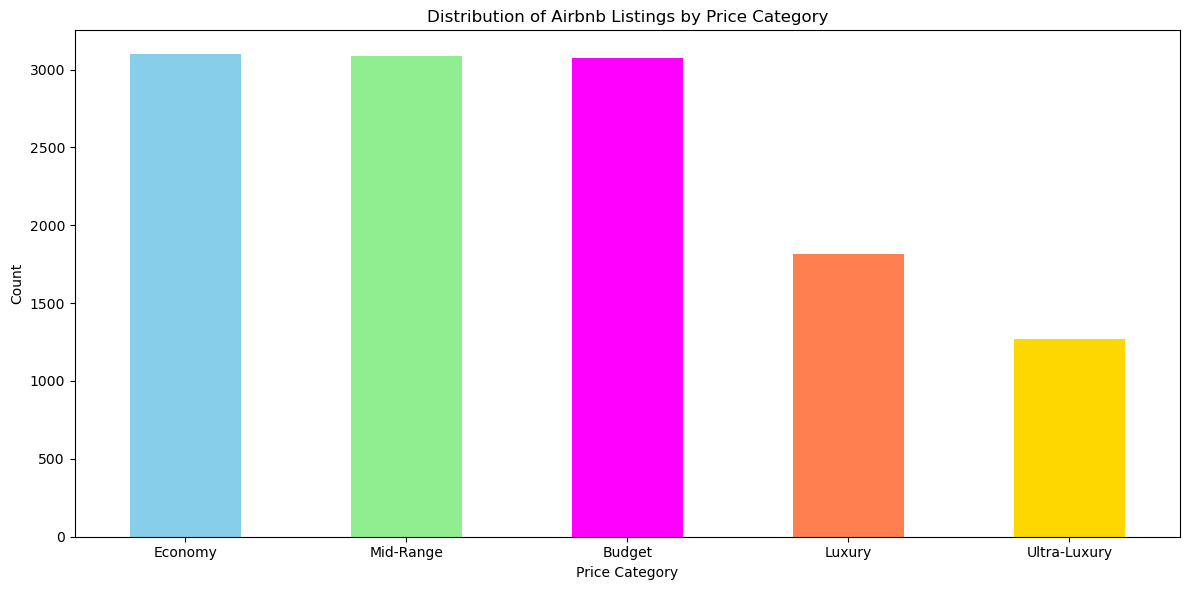

In [16]:
price_counts = airbnb['property_type'].value_counts()

plt.figure(figsize=(12, 6))
price_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'magenta','coral','gold'])
plt.title('Distribution of Airbnb Listings by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

In [17]:
#adding property type to enncoded dataset 

def categorize_price(price):
    if price < 3994:  # Below 25th percentile
        return 'Budget'
    elif 3994 <= price < 8024:  # 25th to 50th percentile
        return 'Economy'
    elif 8024 <= price < 15437:  # 50th to 75th percentile
        return 'Mid-Range'
    elif 15437 <= price < 30000:  # 75th percentile to ~2x the 75th percentile
        return 'Luxury'
    else:  # Above ~2x the 75th percentile
        return 'Ultra-Luxury'

df_encoded['property_type'] = df_encoded['price'].apply(categorize_price)

In [18]:
# Average rating by price category
avg_rating_by_price = df_encoded.groupby('property_type')['rating'].mean().sort_values(ascending=False)

print("Average Rating by Property type:")
print(avg_rating_by_price)



Average Rating by Property type:
property_type
Mid-Range       3.539290
Economy         3.464789
Luxury          3.355025
Budget          3.068575
Ultra-Luxury    2.645449
Name: rating, dtype: float64


In [19]:
# Most common amenities by price category
amenity_columns = [col for col in airbnb.columns if col.startswith('A_')]

def top_amenities(group):
    return group[amenity_columns].sum().nlargest(13).index.tolist()

top_amenities_by_price = df_encoded.groupby('property_type').apply(top_amenities)

print("\nTop 5 Amenities by propert type:")
print(top_amenities_by_price)


Top 5 Amenities by propert type:
property_type
Budget          [A_Parking, A_Internet_Connectivity, A_Outdoor...
Economy         [A_Parking, A_Internet_Connectivity, A_Outdoor...
Luxury          [A_Parking, A_Internet_Connectivity, A_Outdoor...
Mid-Range       [A_Parking, A_Internet_Connectivity, A_Outdoor...
Ultra-Luxury    [A_Internet_Connectivity, A_Parking, A_Outdoor...
dtype: object


## Visualizing top amenites by property type 

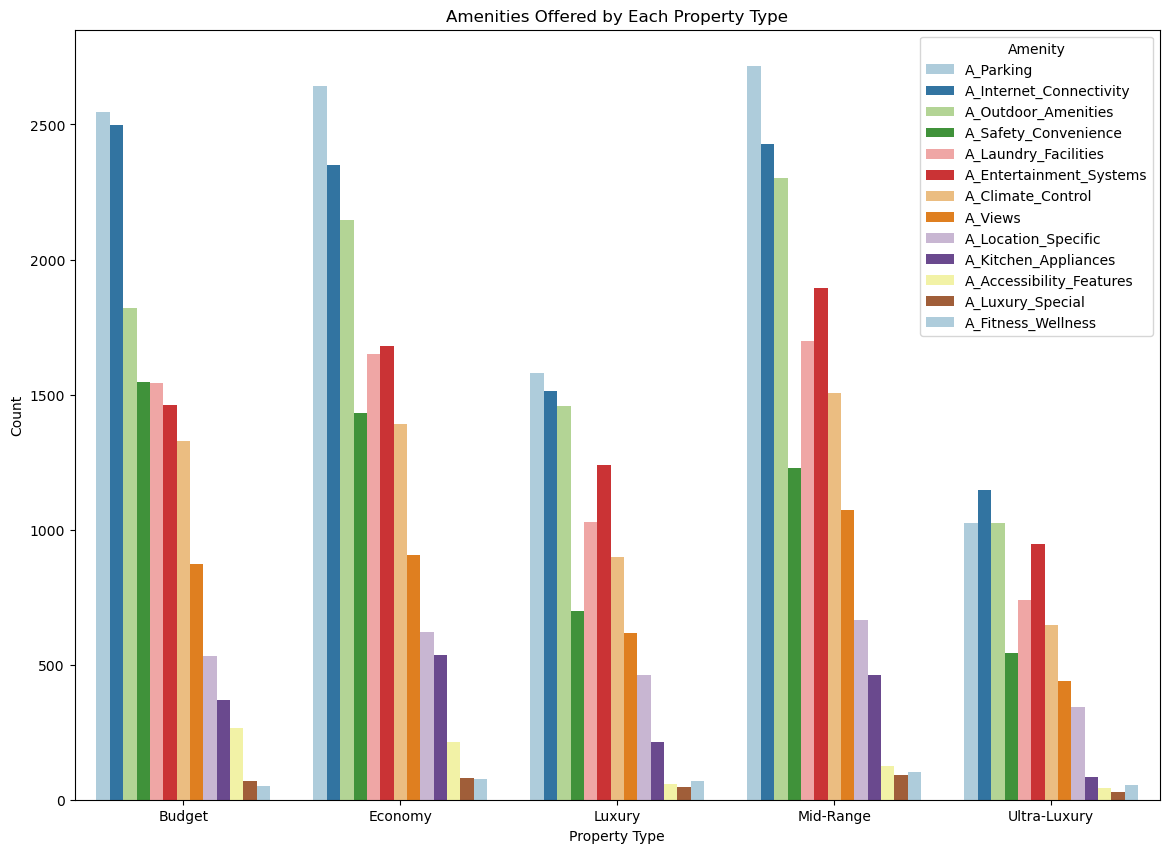

In [20]:
# Convert Series to DataFrame
top_amenities_df = top_amenities_by_price.reset_index()
top_amenities_df.columns = ['Property Type', 'Top Amenities']

# Explode the amenities into separate rows
top_amenities_df = top_amenities_df.explode('Top Amenities')

# Count occurrences of each amenity for each property type
plot_data = []
for index, row in top_amenities_df.iterrows():
    amenity = row['Top Amenities']
    property_type = row['Property Type']
    count = df_encoded[df_encoded['property_type'] == property_type][amenity_columns].sum().get(amenity, 0)
    plot_data.append({'Property Type': property_type, 'Amenity': amenity, 'Count': count})
    
plot_df = pd.DataFrame(plot_data)

# Assuming 'plot_data' is your DataFrame containing amenity data
palette = sns.color_palette("Paired")

plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x='Property Type', y='Count', hue='Amenity', data=plot_df,  palette=palette)
plt.title('Amenities Offered by Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.legend(title='Amenity')
plt.xticks(rotation=0)
plt.show()


#***used AI to generate this code***

Patterns:
---------

1) All home types consistently have high levels of parking and internet connectivity, indicating that these are necessary facilities.  
2) With high counts in the majority of categories, mid-range houses appear to offer the most amenities overall.  
3) Naturally, buildings classified as Luxury or Ultra-Luxury tend to have additional amenities tailored specifically for luxury.  

Notable findings:
----------------

1) Features related to safety and convenience are common in all kinds of properties.  
2) Properties in the Mid-Range have especially good entertainment systems.  
3) Properties in the Economy and Mid-Range tend to have great outdoor facilities.  
4) Mid-Range properties are the most likely to include fitness and wellness amenities, followed by Luxury properties.  

potential insights:
------------------

1) Properties in the Economy and Budget segments prioritise basic features like internet access and parking.  
2) In an apparent attempt to compete with more upscale options, mid-range properties seem to provide the most extensive amenity packages.  
3) There may be fewer luxury and ultra-luxury houses in the dataset, or they may prioritise quality over number when it comes to facilities.  
 

In [ ]:
amenity_columns = [col for col in airbnb.columns if col.startswith('A_')]
amenity_counts = df_encoded[amenity_columns].sum().sort_values(ascending=False).head(13)

plt.figure(figsize=(12, 6))
amenity_counts.plot(kind='bar')
plt.title(' Most Common Amenities')
plt.xlabel('Amenity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 4 amenities are basics amenties that are provided by most of the properties as the following safety and views are amenities that most properties are highlighting 

## Regression analysis 
#### Regression is a statistical method attempts to determine the strength and character of the relationship between a dependent variable and one or more independent variables.

In [ ]:
import statsmodels.api as sm

# Assuming 'df' is your DataFrame
X = df_encoded[['bedrooms', 'bathrooms', 'guests', 'rating','R_pets_allowed', 'R_smoking_allowed',
    'R_parties_allowed', 'R_suitable_for_infants', 'R_self_check_in',
    'S_carbon_monoxide_alarm', 'S_smoke_alarm', 'S_security_camera',
    'S_nearby_water', 'S_heights_risk', 'S_dangerous_animals',
    'S_climbing_structure', 'S_pool_or_hot_tub', 'A_Entertainment_Systems',
    'A_Kitchen_Appliances', 'A_Laundry_Facilities', 'A_Climate_Control',
    'A_Outdoor_Amenities', 'A_Views', 'A_Parking', 'A_Internet_Connectivity',
    'A_Accessibility_Features', 'A_Fitness_Wellness', 'A_Location_Specific',
    'A_Luxury_Special', 'A_Safety_Convenience']]
y = df_encoded['price']

# Add a constant term to the independent variable set
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

## Model Overview

#### The model explains about 29.4% of the variability in Airbnb listing prices.  
#### It's statistically significant overall, indicating that the selected factors do influence prices.  

Key Factors Affecting Price
--------------------------

#### Property Features:  

#### Each additional bedroom: +₹1,692.64  

#### Each additional bathroom: +₹3,497.82 

#### Each additional guest capacity: +₹639.20  


#### Surprising Finding:   Higher ratings are associated with slightly lower prices (-₹731.71 per rating point).    



Significant Amenities:
---------------------

#### Pool or hot tub: +₹4,088.65   
 
#### Carbon monoxide alarm: +₹3,047.04 
 
#### Entertainment systems: +₹2,287.72  
 
#### Outdoor amenities: +₹2,274.69  



Policies:  
---------
 
#### Smoking allowed: -₹4,551.39  

#### Self check-in: -₹1,149.74  


Other Noteworthy Factors:  
------------------------

#### Accessibility features: -₹3,234.24 

#### Parking availability: -₹2,843.35  

#### Internet connectivity: +₹1,122.81  


  


Additional Insights
------------------

#### Luxury and safety features generally increase prices.  
#### Some unexpected decreases in price (e.g., for security cameras) might reflect privacy concerns  
#### The model suggests there are other important factors affecting price not included in this analysis.  ctors that influence pricing strategies.

## Hypothesis testing 
### understanding the unexpected negative relationship between ratings and price.

In [ ]:
import scipy.stats as stats

rating_coef = model.params['rating'] 
rating_se = model.bse['rating'] 
t_statistic = rating_coef / rating_se

# Calculate the p-value (two-tailed test)
degrees_of_freedom = len(df_encoded) - len(model.params)
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), degrees_of_freedom))

print(f"Hypothesis Test: Effect of Ratings on Price")
print(f"Coefficient: {rating_coef:.4f}")
print(f"Standard Error: {rating_se:.4f}")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05  
if p_value < alpha:
    print("\nResult: Reject the null hypothesis")
    print("There is significant evidence to suggest that ratings have an effect on price.")
else:
    print("\nResult: Fail to reject the null hypothesis")
    print("There is not enough evidence to conclude that ratings have a significant effect on price.")

Our analysis of Airbnb listings revealed an unexpected trend: properties with higher ratings tend to be priced lower. This counterintuitive finding suggests a strategic approach by hosts to maximize revenue.

High-rated properties: capitalizing on their strong reputation, might intentionally offer more competitive pricing to achieve several goals:

Increased Booking Volume: Lower prices can attract a larger pool of potential guests, leading to more bookings overall.

Enhanced Occupancy Rates: By keeping prices competitive, hosts can encourage guests to choose their property, resulting in higher occupancy rates.

Boosted Revenue Through Turnover:  More frequent bookings, even at slightly lower prices per stay, can generate higher total revenue for the host.

This strategy is similar to tactics employed in other hospitality sectors. For example, restaurants with excellent reviews often maintain affordable menus to capitalize on increased customer traffic and demand.  

# Conclusion: Airbnb Pricing Analysis

This project analyzed various factors influencing Airbnb listing prices, providing valuable insights for both hosts and guests. Here are the key findings:

## Property Characteristics and Pricing

1. **Size Matters**: The number of bedrooms, bathrooms, and guest capacity are the strongest drivers of price. Each additional bedroom adds ₹1,692.64, each bathroom ₹3,497.82, and each guest ₹639.20 to the price.

2. **Amenities Premium**: Certain amenities significantly increase listing prices:
   - Pool or hot tub: +₹4,088.65
   - Carbon monoxide alarm: +₹3,047.04
   - Entertainment systems: +₹2,287.72
   - Outdoor amenities: +₹2,274.69

3. **Luxury and Safety**: Features associated with luxury and safety generally command higher prices.

## Surprising Price Influences

1. **Ratings Paradox**: Higher-rated properties tend to have slightly lower prices (-₹731.71 per rating point). This suggests a strategic approach by hosts to maximize occupancy and overall revenue.

2. **Policy Impact**: 
   - Allowing smoking decreases price by ₹4,551.39
   - Offering self-check-in reduces price by ₹1,149.74

3. **Unexpected Decreases**: Some features unexpectedly decrease prices:
   - Accessibility features: -₹3,234.24
   - Parking availability: -₹2,843.35
   - Security cameras: Slight decrease, possibly due to privacy concerns

## Market Segmentation Insights

1. **Budget and Economy Segments**: Focus on basic amenities like internet access and parking.

2. **Mid-Range Properties**: Offer the most extensive amenity packages, likely to compete with upscale options.

3. **Luxury and Ultra-Luxury**: May prioritize quality over quantity in amenities, or be underrepresented in the dataset.

## Model Performance and Limitations

- The regression model explains about 29.4% of price variability, indicating that while significant factors have been identified

- Complex relationships exist between features, prices, and ratings, suggesting that local market dynamics and combinations of features play crucial roles.

## Strategic Implications

1. **For Hosts**: 
   - Consider strategic pricing based on property features and local market dynamics.
   - Invest in high-impact amenities to justify higher prices.
   - For well-rated properties, consider competitive pricing to maximize occupancy and overall revenue.

2. **For Guests**: 
   - Be aware that higher-rated properties might offer better value for money.
   - Consider the trade-offs between price and specific amenities or policies.

3. **For Airbnb**: 
   - Use these insights to guide hosts in optimal pricing and investment decisions.
   - Consider refining the search and filter options based on high-impact features.

This analysis provides a data-driven foundation for understanding Airbnb pricing dynamics, benefiting hosts, guests, and platform managers alike. Future research could explore additional factors such as seasonality, local events, and more granular location data to further enhance our understanding of Airbnb pricing strategies.

In [ ]:
airbnb = pd.to_csv("airbnb_cleaned_2")